# Generation of artificial datasets
In this notebook we are going to introduce the code to generate artificial samples using splatter. Splatter allows us to generate artificial samples with varying number of genes and cells, number of groups and mixture between groups. These datasets are interesting to see ideal scenarios, that, is, to hace a ground truth where we can compare efficiency of feature selection of different feature selection methods.

The number of genes and number of cells will be 15000 and 10000 respectively. 15000 genes is high enough to be similar to the numbers obtained in real datasets after filtering genes in less than 5 or 10 cells. Also, 10000 cells is high enough to get good quality UMAPs, a real-life number of cells (even in the high-end, but that's good to see time performance) and high enough to see time performance efficience and, if necessary, to reduce the number of cells later.

The datasets will contain 9 groups with different proportions (0.25, 0.2, 0.15, 0.1, 0.1, 0.07, 0.055, 0.04, 0.035), and we will also include a parametter called *differential expression probability*. The general idea of this parameter is that, the lower the probability, the more mixed the expression and the more difficult to tell different groups apart. We will use this property later in other notebooks to measure the performance of different methods.

In [1]:
%matplotlib inline

In [2]:
import scanpy as sc
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
import rpy2.rinterface_lib.callbacks
from rpy2.robjects import pandas2ri
import anndata2ri, logging

# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [4]:
save_dir = "../data/splatter/"

In [5]:
os.makedirs(save_dir, exist_ok=True)

In [6]:
ls $save_dir

In [7]:
%%R
library(splatter)


Error in library(splatter) : there is no package called ‘splatter’


In [ ]:
%%R 

generate_splatter <- function(de_prob){
    params <- newSplatParams()
    params <- setParams(params, update= list(seed=1, nGenes=15000, batchCells=10000))
    params <- setParams(params, update= list(group.prob = c(0.25, 0.2, 0.15, 0.1, 0.1, 0.07, 
                                                            0.055, 0.04, 0.035), 
                                            de.prob=de_prob))

    sim <- splatSimulate(params, method='groups')
    counts <- counts(sim)
    
    return(list("sim"=sim, "counts"=counts))
}

In [ ]:
def preprocess_sim(sim):
    sc.pp.filter_genes(sim, min_cells=1) # to prevent triku from failing with zero-expressed genes
    sc.pp.filter_cells(sim, min_genes=1)
    sc.pp.calculate_qc_metrics(sim, inplace=True)

In the return we include the counts separately because when getting the adata from sim, the counts are messed up (I don't know why, maybe is something from r2py or adata2ri or something like that). In any case, we are going to create the adatas and apply the counts, and that's all.

### DE prob = 0.005

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.005)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.005.loom')  # loom is better because we can later read on cache

### DE prob = 0.0065

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.0065)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.0065.loom')  # loom is better because we can later read on cache

### DE prob = 0.008

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.008)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.008.loom')  # loom is better because we can later read on cache

### DE prob = 0.01

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.01)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.01.loom')  # loom is better because we can later read on cache

### DE prob = 0.013

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.013)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.013.loom')  # loom is better because we can later read on cache

### DE prob = 0.016

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.016)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.016.loom')  # loom is better because we can later read on cache

### DE prob = 0.025

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.025)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.025.loom')  # loom is better because we can later read on cache

### DE prob = 0.05

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.05)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)
sim.write_loom(save_dir + 'splatter_deprob_0.05.loom')  # loom is better because we can later read on cache

### DE prob = 0.1

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.1)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.1.loom')  # loom is better because we can later read on cache

### DE prob = 0.3

In [ ]:
%%R -o sim -o counts

simcounts_list <- generate_splatter(0.3)

sim <- simcounts_list$sim
counts <- simcounts_list$counts

In [ ]:
sim.X = counts.T

del sim.uns['Params']  # throws error when saving adata
preprocess_sim(sim)

sim.write_loom(save_dir + 'splatter_deprob_0.3.loom')  # loom is better because we can later read on cache

# Plotting the datasets

To see the effect of differential expression probability, we are going to run a simple pipe using all genes in each dataset, and plot a UMAP. We will show the groups the cells belong to.

In [11]:
list_adatas = []

for de in [0.005, 0.0065, 0.008, 0.01, 0.013, 0.016, 0.025, 0.05, 0.1, 0.3]:
    adata = sc.read(save_dir + 'splatter_deprob_{}.loom'.format(de), cache=True)
    
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.pp.log1p(adata)
    sc.tl.umap(adata)
    
    list_adatas.append(adata)

/home/seth/anaconda3/envs/alex-base/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../home/seth/anaconda3/envs/alex-base/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/seth/anaconda3/envs/alex-base/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/home/seth/anaconda3/envs/alex-base/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: Th

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f05f6639090>,
      dtype=object)

In [34]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

... storing 'DE_0.005' as categorical
... storing 'DE_0.0065' as categorical
... storing 'DE_0.008' as categorical
... storing 'DE_0.01' as categorical
... storing 'DE_0.013' as categorical
... storing 'DE_0.016' as categorical
... storing 'DE_0.025' as categorical
... storing 'DE_0.05' as categorical
... storing 'DE_0.1' as categorical
... storing 'DE_0.3' as categorical


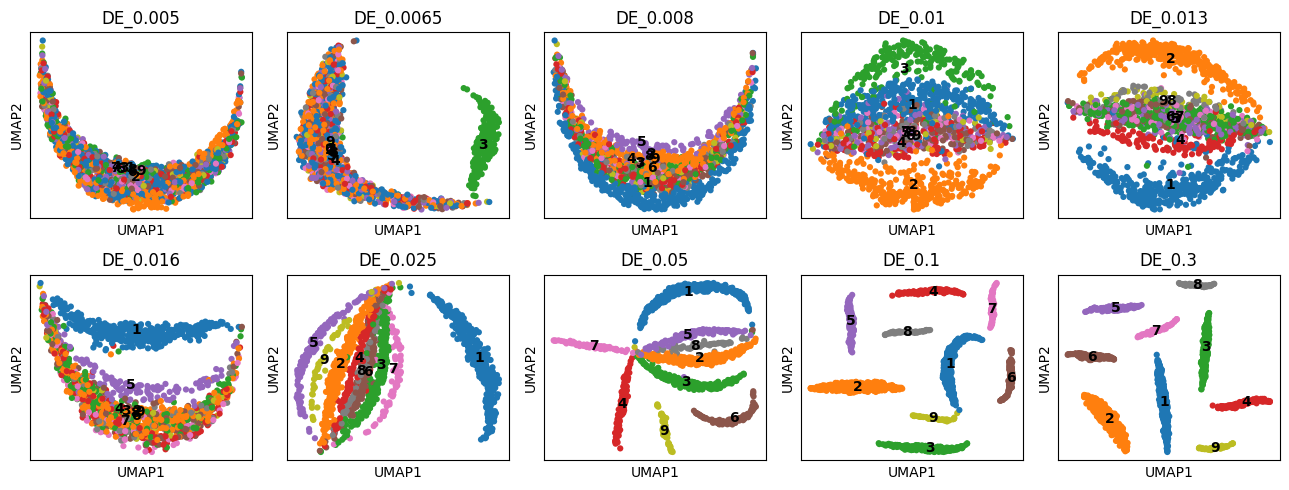

In [37]:
fig, axs = plt.subplots(2, 5, figsize=(13, 5))

list_DEs = [0.005, 0.0065, 0.008, 0.01, 0.013, 0.016, 0.025, 0.05, 0.1, 0.3]

for i in range(len(list_adatas)):
    ax = axs.ravel()[i]
    adata = list_adatas[i].copy()
    sc.pp.subsample(adata, 0.15)  
    adata.obs[f'DE_{list_DEs[i]}'] = [i.replace('Group', '') for i in adata.obs['Group']]
    sc.pl.umap(adata, color=[f'DE_{list_DEs[i]}'], legend_loc='on data', ax=ax, show=False)

plt.tight_layout()
plt.savefig(os.getcwd() + '/figures/scatter_datasets.pdf', bbox_inches='tight')   

... storing 'groupn' as categorical


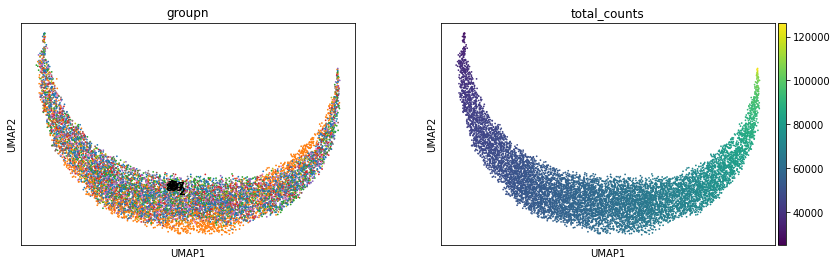

... storing 'groupn' as categorical


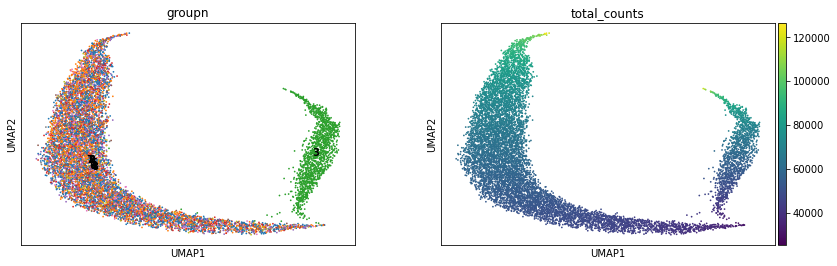

... storing 'groupn' as categorical


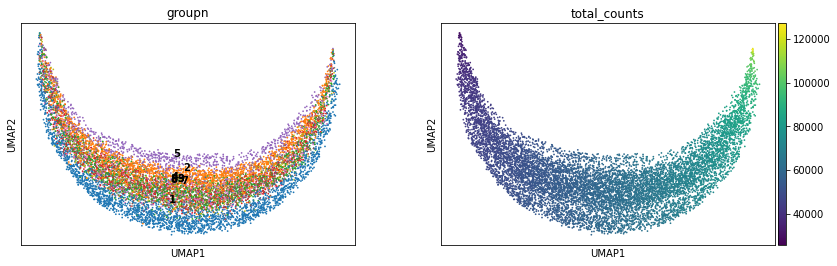

... storing 'groupn' as categorical


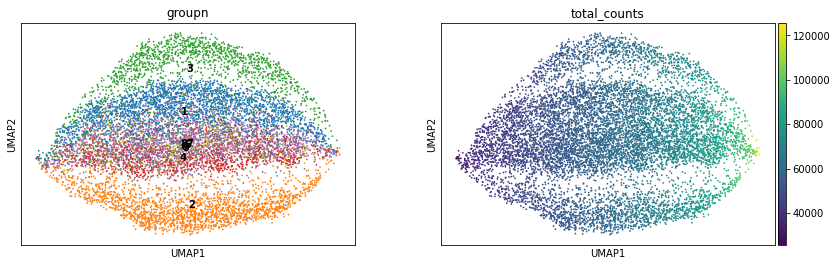

... storing 'groupn' as categorical


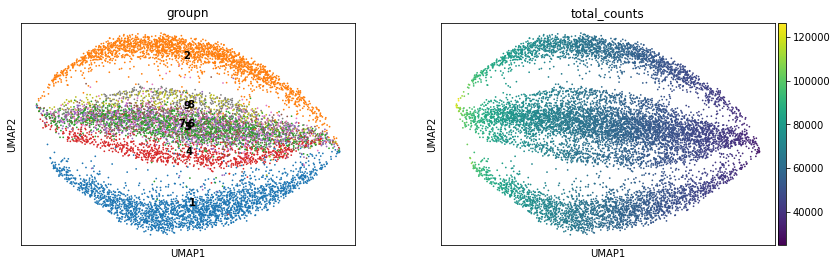

... storing 'groupn' as categorical


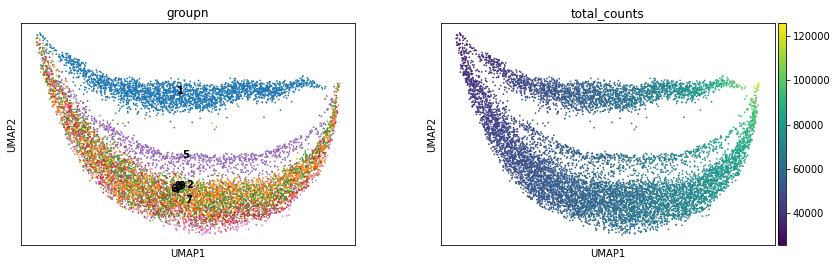

... storing 'groupn' as categorical


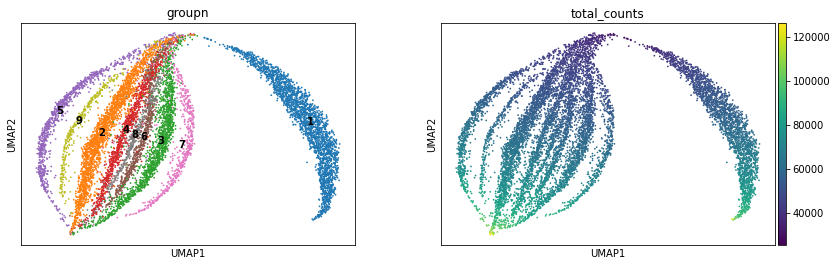

... storing 'groupn' as categorical


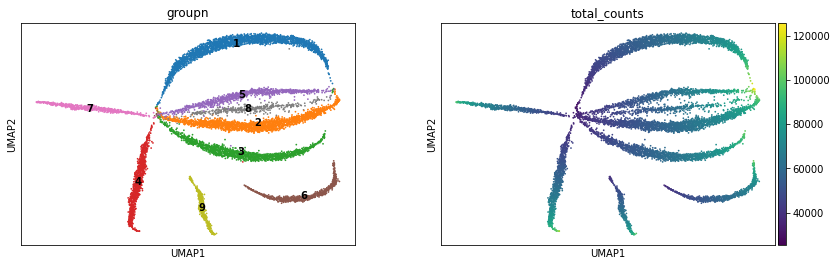

... storing 'groupn' as categorical


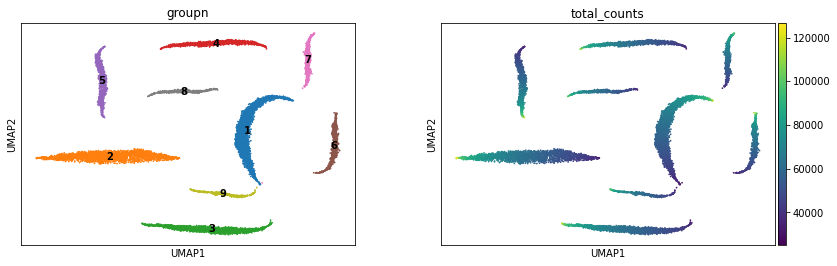

... storing 'groupn' as categorical


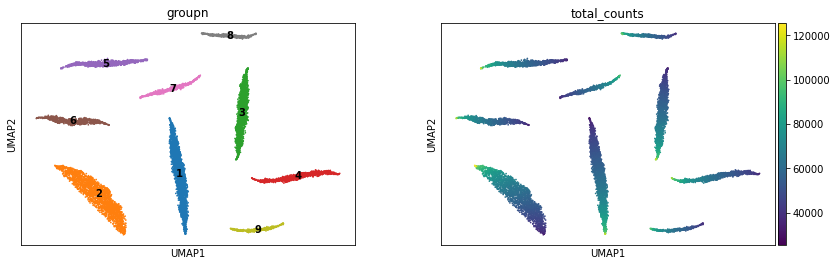

In [12]:
for adata in list_adatas:
    adata.obs['groupn'] = [i.replace('Group', '') for i in adata.obs['Group']]
    sc.pl.umap(adata, color=['groupn', 'total_counts'], legend_loc='on data')